In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
import warnings
warnings.filterwarnings("ignore")
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000186B9FAEEB8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000186BE791278>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000186BE7910B8>)

In [5]:
mnist.train.images.shape, mnist.test.images.shape, mnist.validation.images.shape

((55000, 784), (10000, 784), (5000, 784))

In [6]:
mnist.train.labels.shape, mnist.test.labels.shape, mnist.validation.labels.shape

((55000, 10), (10000, 10), (5000, 10))

In [7]:
mnist.train.labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [8]:
import numpy as np
import matplotlib.pyplot as plt

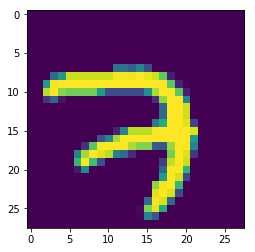

In [9]:
first_image = np.array(mnist.train.images[0], dtype = "float")
first_image = first_image.reshape(28, 28)
plt.imshow(first_image)
plt.show()

In [10]:
######Explanation: from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original', data_home=custom_data_home)
#will fetch the MNIST dataset
from sklearn import datasets

In [11]:
#ds = datasets.fetch_mldata('MNIST_sklearn_data')

In [12]:
sess = tf.Session()
sess.run(tf.random_normal([10]))

array([-0.17180726, -2.07381   ,  1.5472604 ,  0.15074083, -0.2098613 ,
        0.4114001 ,  0.09779878,  1.1186794 ,  0.20473269, -1.8972969 ],
      dtype=float32)

In [13]:
785*256 + 257*256 + 257*10

269322

In [40]:
n_input_layer = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_output_layer = 10
weights = {
    "h1" : tf.Variable(tf.random_normal((n_input_layer, n_hidden_1))),
    "h2" : tf.Variable(tf.random_normal((n_hidden_1, n_hidden_2))),
    "out" : tf.Variable(tf.random_normal((n_hidden_2, n_output_layer)))
}
    
biases = {
    "h1" : tf.Variable(tf.random_normal([n_hidden_1]),),
    "h2" : tf.Variable(tf.random_normal([n_hidden_2])),
    "out" : tf.Variable(tf.random_normal([n_output_layer]))
}

"""
weights = {
    "h1" : tf.Variable(tf.random_normal((n_input_layer, n_hidden_1)), trainable=False),
    "h2" : tf.Variable(tf.random_normal((n_hidden_1, n_hidden_2)), trainable=False),
    "out" : tf.Variable(tf.random_normal((n_hidden_2, n_output_layer)), trainable=False)
}
    
biases = {
    "h1" : tf.Variable(tf.random_normal([n_hidden_1]), trainable=False),
    "h2" : tf.Variable(tf.random_normal([n_hidden_2]), trainable=False),
    "out" : tf.Variable(tf.random_normal([n_output_layer]), trainable=False)
}
"""

'\nweights = {\n    "h1" : tf.Variable(tf.random_normal((n_input_layer, n_hidden_1)), trainable=False),\n    "h2" : tf.Variable(tf.random_normal((n_hidden_1, n_hidden_2)), trainable=False),\n    "out" : tf.Variable(tf.random_normal((n_hidden_2, n_output_layer)), trainable=False)\n}\n    \nbiases = {\n    "h1" : tf.Variable(tf.random_normal([n_hidden_1]), trainable=False),\n    "h2" : tf.Variable(tf.random_normal([n_hidden_2]), trainable=False),\n    "out" : tf.Variable(tf.random_normal([n_output_layer]), trainable=False)\n}\n'

In [41]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    
    return output


In [42]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [43]:
x = tf.placeholder(tf.float32, shape = [None, n_input_layer])
y = tf.placeholder(tf.int32, shape = [None, n_output_layer])
pred = forward_propagation(x, weights, biases)

In [44]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred, labels = y))

In [45]:
#print("Initial Cost")
#sess.run(cost, feed_dict = {x : mnist.test.images, y : mnist.test.labels})

In [46]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
optimize = optimizer.minimize(cost)
optimizer, optimize

(<tensorflow.python.training.adam.AdamOptimizer at 0x186ceaeefd0>,
 <tf.Operation 'Adam_1' type=NoOp>)

In [47]:
sess.run(tf.global_variables_initializer())
for i in range(20) :
    c, _ = sess.run([cost, optimize], feed_dict = {x : mnist.train.images, y : mnist.train.labels})
    print(c)

1194.4977
898.99585
727.7549
608.4274
497.01047
394.3264
317.20242
267.88516
235.30142
209.81757
187.39154
168.03891
152.22484
140.09033
130.70456
122.89674
116.01296
109.9962
104.79336
100.25467


In [22]:
type(mnist.test.images)

numpy.ndarray

In [23]:
predictions = tf.argmax(pred, axis = 1)
true_labels = tf.argmax(y, axis =1)
is_correct_predictions = tf.equal(predictions, true_labels)

In [24]:
pred_eval, labels, is_correct_pred = sess.run([predictions, true_labels, is_correct_predictions], feed_dict = {x : mnist.test.images, y : mnist.test.labels})

In [25]:
pred_eval, labels, is_correct_pred

(array([7, 2, 1, ..., 8, 6, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ..., False, False,  True]))

In [26]:
is_correct_pred.sum()/len(is_correct_pred)

0.7391

In [27]:
pred_eval, labels, is_correct_pred = sess.run([predictions, true_labels, is_correct_predictions], feed_dict = {x : mnist.train.images, y : mnist.train.labels})

In [28]:
pred_eval, labels, is_correct_pred

(array([7, 9, 9, ..., 5, 6, 8], dtype=int64),
 array([7, 3, 4, ..., 5, 6, 8], dtype=int64),
 array([ True, False, False, ...,  True,  True,  True]))

In [29]:
is_correct_pred.sum()/len(is_correct_pred)

0.7230181818181818

In [48]:
# batch grient descent
#sess.run(tf.global_variables_initializer())

import time
st = time.time()
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        #print(batch_x.dtype, batch_y.dtype)
        c, _ = sess.run([cost, optimize], feed_dict = {x : batch_x, y : batch_y})
        total_cost += c
    print(total_cost)
et = time.time()
print("runtime", round(et-st))

32588.01963186264
7016.970196247101
3753.4384163473105
2299.625412654367
1530.134614520874
1288.2463393419148
1088.7448129054428
1118.0644753501144
865.7043863906432
777.2852799317602
927.174699266692
673.2441096772852
694.6506424055015
557.8979909215253
534.6494022499719
615.9733159931056
590.0439077610218
540.8206579403852
467.21469105599084
421.40273497054244
416.2512827223412
413.00247223653804
385.09843190394895
360.5397564214505
342.8405294644077
runtime 65


In [31]:
predictions = tf.argmax(pred, axis = 1)
true_labels = tf.argmax(y, axis =1)
is_correct_predictions = tf.equal(predictions, true_labels)
is_correct_pred.sum()/len(is_correct_pred)

0.7230181818181818